使用するモジュールのimport

In [3]:
import sys, os
import numpy as np
import matplotlib.pyplot as plt
# import japanize_matplotlib
import pandas as pd
from pandas import DataFrame
pd.set_option('display.precision', 3)   # 小数点以下の表示桁
pd.set_option('display.max_rows', 20)  # 表示する行数
%precision 3

'%.3f'

## データの整理

### 質的データ・量的データと尺度


データには**質的データ**と**量的データ**の2種類がある．
質的データとは，数値で表すことができず，あるカテゴリーに属していることやある状態にあることだけが分かるデータである．
例えば，性別（男，女），学歴（大卒，高卒，中卒），天気（晴，曇，雨，雪），などは質的データである．
一方，量的データとは，数値で表すことができるデータのことを指す．
例えば，長さ，重さ，体積，面積，金額，温度，時間などは量的データである．

質的データは，どのような尺度で測定されたかという基準によって，さらに２つに分類できる．
まず，「男・女」など，他と区別するためだけに用いる尺度を**名義尺度**と呼び，対応するデータをカテゴリカルデータと呼ぶ．
カテゴリカルデータに対しては一切の計算が許されず，唯一できるのは数をカウントすること（度数や最頻値の計算）だけである．
一方，「小・中・大」のように大小や前後が決まるような尺度を**順序尺度**と呼び，対応するデータを順序データと呼ぶ．
順序データに対しては$ >, = $などの演算が許される．

次に，量的データも測定尺度によって2つに分類できる．
まず，値の大小関係と値の差だけに意味があるような尺度を**間隔尺度**と呼び，対応するデータは間隔データと呼ばれる．
間隔データは値同士の加減が許される．
間隔データの代表例は，摂氏・華氏温度や時刻である．
例えば，摂氏温度は水の融点を0℃，沸点を100℃としてその間を等分した尺度なので，値の大小関係と差に意味はあるが，比に意味はない．
実際，4℃と8℃を比較して4℃暑いということはできるが，2倍暑いなどということはできない\footnote{比例尺度である絶対温度で表すと，4℃は277.15K，8℃は281.15Kであり，その比は2倍ではない\cite{d}．}．
一方，値の大小関係と値の差に加えて，値同士の比にも意味があるような尺度を\textbf{比率尺度}と呼び，対応するデータは比率データと呼ぶ．
比率データは値同士の加減乗除が全て許される．
比率データの代表例は身長，体重，年齢などである．
例えば，身長150cmと180cmには「値の大小関係」があり，「値の差」も30cmと意味がある．
また100cmと200cmであれば，「後者は前者の2倍」であると解釈でき，比が意味を持つ．
K（ケルビン）で表される絶対温度も比例データの例である．
実際，絶対温度は値0が絶対的な意味を持ち，1Kと2Kではある量が実際に2倍になっているので比にも意味がある．

間隔尺度と比例尺度が見分けづらい場合は，「0の値が相対的な意味しか持たない」場合が間隔尺度，「0の値が絶対的な意味を持つ」（ある量が無いことを意味する）場合が比率尺度と考えると良い．
例えば，摂氏温度や西暦が0だったとしてもそれらは無いわけではないが，身長や速度が0であるときは本当に無いので，前者は間隔尺度，後者は比例尺度の例である．

### 量的データの要約

#### 四分位数と五数要約

15個の量的データがあるとする．
これを小さい順に並べたとき，{numref}`fig:5number`のように4等分に分割できる．
このとき，アを**最小値**，イを**第1四分位**，ウを**中央値（第2四分位数）**，エを**第3四分位数**，オを**最大値**と呼ぶ．
また，データを小さい順に並べたとき，左半分のデータを下位データ，右半分のデータを上位データと呼ぶ．
ただし，データの数が奇数個の場合は中央値を除いて下位・上位に分ける方法を採用する（中央値を両方に含める場合もある）．
このとき，第1四分位数$ Q_{1} $は下位データの中央値，第3四分位数$ Q_{3} $は上位データの中央値である．
以上のようにデータのばらつきを5つの数で表す方法を**五数要約**と呼ぶ．
また，第3四分位数と第1四分位数の差$ Q_{3}-Q_{1} $を**四分位範囲**と呼ぶ．
なお，四分位は英語でquartileなので，各四分位数（イ，ウ，エ）を$ Q_{1},\ Q_{2},\ Q_{3} $と表すことが多い．

```{figure} 5number.png
---
height: 150px
name: fig:5number
---
15個の量的データを小さい順に並べた例．
```

五数要約の求め方はデータの数が奇数個の場合と偶数個の場合で異なる．
まず，データの数が奇数個の場合は最小値，最大値，中央値が自動的に定まる．
一方，中央値を除いて下位データと上位データに分けると，それぞれが偶数個になる．
この場合，下位データ，上位データそれぞれの中央にくる2つの値の平均値を第1四分位数，第3四分位数とする．

次に，データの数が偶数個の場合は中央にくる2つの値の平均値を中央値とする．
下位データと上位データはそれぞれ奇数個に分かれるので，第1四分位数，第3四分位数は自動的に求まる．

以下に具体例を示す．

**例）データが9個（奇数個）の場合**
```
2 3 5 5 | 6 | 8 10 12 15
```
この場合，中央値は$ Q_{2}=6 $となるので，これを除いて下位データと上位データに分ける．
第1四分位数は$ Q_{1}=(3+5)/2=4 $，第3四分位数は$ Q_{3}=(10+12)/2=11 $と求まる．
四分位範囲は$ Q_{3}-Q_{1}=11-4=7 $である．


**例）データが10個（偶数個）の場合**
```
2 2 5 6 7 | 9 10 13 14 18
```
この場合，中央値は$ Q_{2}=(7+9)/2=8 $となる．
また，第1四分位数は$ Q_{1}=5 $，第3四分位数は$ Q_{3}=13 $と求まる．
四分位範囲は$ Q_{3}-Q_{1}=13-5=8 $である．

##### Pythonでの例
- [pythonで四分位点や任意の分位点を計算する3つの方法](https://bunsekikobako.com/how_to_get_quantile_information_with_python/)

In [4]:
x1 = [15, 20, 23, 20, 19, 21, 20, 18, 23, 18, 19, 20, 22]
x2 = [7, 6, 9, 6, 10, 13, 12, 10, 14, 18, 7, 10, 13, 22]

In [5]:
# 最小値，第1四分位数，中央値，第3四分位数，最大値
np.percentile(x1, q=[0, 25, 50, 75, 100])

array([15., 19., 20., 21., 23.])

In [6]:
# 最小値，第1四分位数，中央値，第3四分位数，最大値
np.percentile(x2, q=[0, 25, 50, 75, 100])

array([ 6. ,  7.5, 10. , 13. , 22. ])

#### 箱ひげ図

- [matplotlib.pyplot.boxplot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.boxplot.html)
- [箱ひげ図を描く【Python】](https://biotech-lab.org/articles/4978)

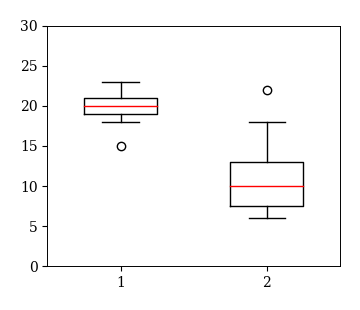

In [10]:
fig, ax = plt.subplots()
ret = ax.boxplot([x1, x2], whis=1.5, widths=0.5, vert=True)

ax.set_ylim(0, 30);  # 縦軸の表示範囲
ax.set_yticks([0, 5, 10, 15, 20, 25, 30]);  # 縦軸の表示目盛り
# fig.savefig('figure/box_ex.pdf', bbox_inches="tight", pad_inches=0.2, transparent=True, dpi=300) # 保存

#### ヒストグラム

- [【データサイエンティスト入門編】探索的データ解析（EDA）の基礎操作をPythonを使ってやってみよう](https://www.codexa.net/basic-exploratory-data-analysis-with-python/)

- Iris Dataset
    - Kaggleにて無料会員登録後に下記のURLからダウロード可
    - https://www.kaggle.com/uciml/iris
- アヤメのデータセット
    - Sepal Length – がく片の長さ(cm)
    - Sepal Width – がく片の幅(cm)
    - Petal Length – 花弁の長さ(cm)
    - Petal Width – 花弁の幅(cm)

In [41]:
# CSVファイルをPandasのデータフレーム形式で読み込み
Iris = pd.read_csv('Iris.csv')
Iris = Iris.iloc[:, 1:5]

In [12]:
Iris.columns=['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']

In [13]:
# ビンの個数（スタージェスの公式）
BN = int(1+np.log2(len(Iris)))

In [14]:
# がく片の長さに対する度数分布表
f, x = np.histogram(Iris['Sepal Length'], bins=BN, density=0)
df = DataFrame(np.c_[x[:-1], x[1:], 0.5*(x[1:]+x[:-1]), f, 100*f/len(Iris), 100*np.cumsum(f/len(Iris))],
          columns=['最小', '最大', '階級値', '度数', '相対度数', '累積相対度数'])
# df.to_csv('material/sec_2-1/fdt.csv', index=False, encoding="shift-jis")
df

,最小,最大,階級値,度数,相対度数,累積相対度数
0,4.30,4.75,4.525,11.0,7.333,7.333
1,4.75,5.20,4.975,30.0,20.000,27.333
2,5.20,5.65,5.425,24.0,16.000,43.333
3,5.65,6.10,5.875,24.0,16.000,59.333
4,6.10,6.55,6.325,31.0,20.667,80.000
5,6.55,7.00,6.775,17.0,11.333,91.333
6,7.00,7.45,7.225,7.0,4.667,96.000
7,7.45,7.90,7.675,6.0,4.000,100.000


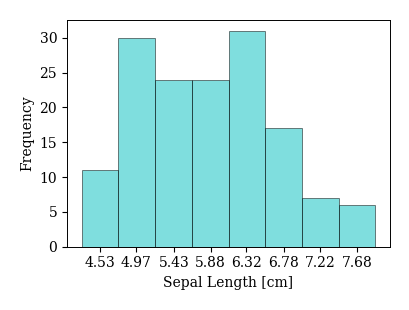

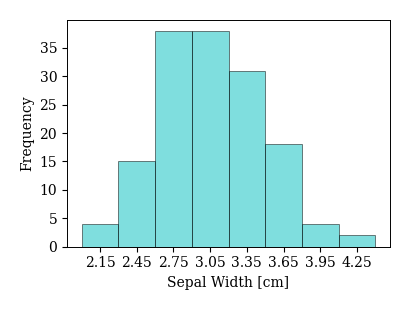

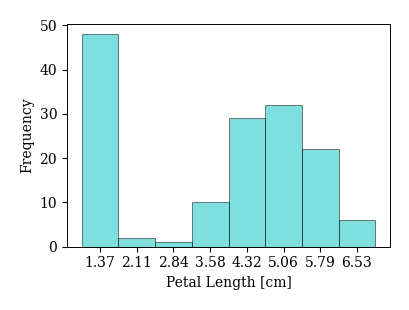

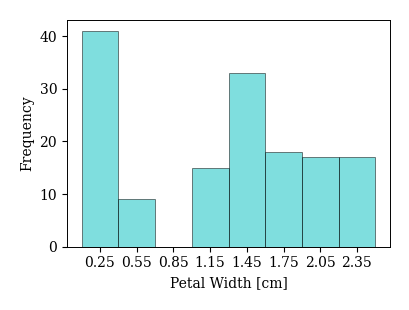

In [17]:
# ヒストグラムの描画と保存
for i in Iris.columns:
    fig, ax = plt.subplots(figsize=(4, 3))
    x = ax.hist(Iris[i], bins=BN, histtype='bar', color='c', ec='k', alpha=0.5)[1]
    x2 = np.round(0.5*(x[1:]+x[:-1]), 2)  # 横軸に表示する階級値を計算（中央値）

    ax.set_xticks(x2) 
    ax.set_xlabel(i+' [cm]')
    ax.set_ylabel('Frequency')
    # fig.savefig('figure/histogram_s.pdf'  i, bbox_・inches="tight", pad_inches=0.2, transparent=True, dpi=300) # 保存

### 実例：夏の避暑地の気候の特徴〜夏の避暑地が快適な理由は？〜

日本への外国人旅行者は近年急増しているが，一方で，日本人の国内旅行者の動向を月別に見ると，表\ref{tb:travel}のように月ごとに変動している．
特に，5月や8月は国内旅行者の数が突出して多くなっているが，これはゴールデンウィークや夏休みを利用して旅行する人が多いからである．

実習
- 表2.2のデータから折れ線グラフを作成せよ

In [18]:
# 2015年の月別国内旅行者数
df = DataFrame({'month': np.arange(12)+1,
                'number': [4315, 3620, 5331, 4456, 6322, 4693, 4458, 7177, 5707, 4647, 4794, 4952]})
df

,month,number
0,1,4315
1,2,3620
2,3,5331
3,4,4456
4,5,6322
5,6,4693
6,7,4458
7,8,7177
8,9,5707
9,10,4647


Text(0, 0.5, 'number')

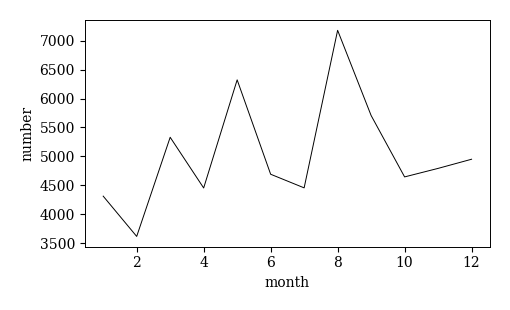

In [19]:
fig, ax = plt.subplots(figsize=(5, 3))
ax.plot(df['month'], df['number'])
ax.set_xlabel('month')
ax.set_ylabel('number')

#### STEP 1: Problem
ある高校に通う5人の高校生は，2015年の夏休みにそれぞれ別の都市で過ごした．
以下は日本の各都市についての気候に関する意見をまとめたものである．

- 軽井沢は東京と比べて過ごしやすかった
- 東京も今年は涼しい日もあったけど，すごく暑い日が多かった
- 熊谷は東京以上に暑かった
- 沖縄は暑かったけど，慣れてしまえば逆に過ごしやすかった
- 札幌は過ごしやすかったけど，大阪は東京と同じように暑かった

それぞれの場所で，本当に暑さに違いはあったのだろうか？
特に，日本では，夏に避暑地を訪れる人が多いが，避暑地にはどのような特徴があるのだろうか？

#### STEP2: Plan
気象庁のHP (http://www.data.jma.go.jp/gmd/risk/obsdl/index.php) には1日の平均気温，最高気温，最低気温，湿度などのデータが掲載されている．
ここでは，1日の最高気温，最低気温，湿度のデータを収集する．

収集したデータは五数要約や箱ひげ図によって傾向を調べる．
また，夏の蒸し暑さを定量化した指標である\textbf{不快指数}を計算し，各都市の特徴を調べる．
不快指数は気温を$ t $，湿度を$ H $とすると
$$
	不快指数=0.81t + 0.01H(0.99t-14.3)+46.3
$$
によって求められる．
一般に，不快指数が75になると人口の約1割が不快を感じ，85になると全員が不快になる（三省堂編集所，大辞林，三省堂(1988)）．

#### STEP3: Data

##### 実習
- [気象庁のHP](http://www.data.jma.go.jp/gmd/risk/obsdl/index.php)から2015年8月の各地点の1日の平均気温，最高気温，最低気温，湿度のデータ（csvファイル）をダウンロードせよ．
- ダウンロードしたデータをpythonなどで解析しやすいように加工せよ．

In [20]:
# 加工済みcsvデータ
Tave = pd.read_csv('temp_ave.csv')
Tmax = pd.read_csv('temp_max.csv')
Tmin = pd.read_csv('temp_min.csv')
H = pd.read_csv('humidity.csv')

#### STEP4: Analysis

##### 実習：最高気温
- 各都市の最高気温のデータに対し，五数要約と四分位範囲を求めよ．
- 五数要約の結果から，各都市に対して並行箱ひげ図を作成せよ．

In [25]:
Tmax.describe().loc[['min', '25%','50%', '75%','max']]

,Tokyo,Karuizawa,Kumagaya,Ishigakijima,Sapporo,Osaka
min,21.00,15.90,20.70,28.70,21.70,26.60
25%,27.65,21.70,27.25,30.90,24.55,31.65
50%,31.90,27.00,33.80,31.50,26.50,33.10
75%,34.35,29.15,35.15,32.75,27.80,36.25
max,37.70,31.10,38.60,33.60,34.50,38.00


Text(0, 0.5, 'Maximum Temperature [$^\\circ$C]')

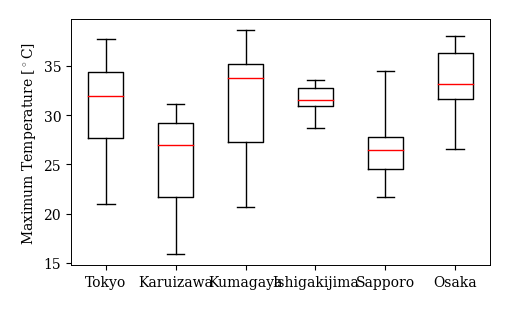

In [28]:
fig, ax = plt.subplots(figsize=(5,3))
ret = ax.boxplot(Tmax.values, labels=Tmax.columns, whis=100, widths=0.5, vert=True)
ax.set_ylabel('Maximum Temperature [$^\circ$C]')
# ax.set_ylim(0, 30)  # 縦軸の表示範囲
# ax.set_yticks([0, 5, 10, 15, 20, 25, 30])  # 縦軸の表示目盛り
# fig.savefig('figure/box_ex.pdf', bbox_inches="tight", pad_inches=0.2, transparent=True, dpi=300) # 保存

##### 実習：最低気温
- 各地点の最低気温のデータについて，並行箱ひげ図を作成せよ
- 各地点について，熱帯夜（最低気温が25℃以上の夜）の日数を求めよ

Text(0, 0.5, 'Minimum Temperature [$^\\circ$C]')

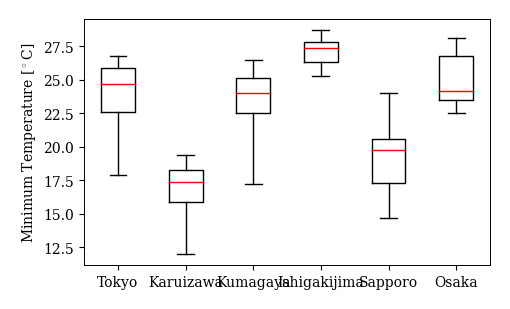

In [29]:
fig, ax = plt.subplots(figsize=(5,3))
ret = ax.boxplot(Tmin.values, labels=Tmax.columns, whis=100, widths=0.5, vert=True)
ax.set_ylabel('Minimum Temperature [$^\circ$C]')

In [30]:
# 熱帯夜の日数
(Tmin >= 25).sum(axis=0)

Tokyo           13
Karuizawa        0
Kumagaya         9
Ishigakijima    31
Sapporo          0
Osaka           13
dtype: int64

##### 実習：不快指数

- 6地点の2015年8月1日から31日までの不快指数を計算せよ
- 各地点の不快指数のデータについて，並行箱ひげ図を作成せよ

In [ ]:
DI = 0.81*Tave + 0.01*H*(0.99*Tave-14.3)+46.3
DI

Text(0, 0.5, 'Discomfort Index')

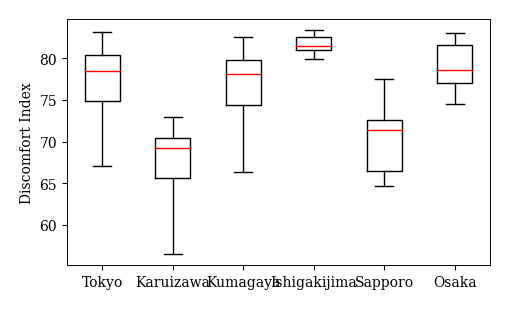

In [32]:
fig, ax = plt.subplots(figsize=(5,3))
ret = ax.boxplot(DI.values, labels=DI.columns, whis=100, widths=0.5, vert=True)
ax.set_ylabel('Discomfort Index')

#### STEP 5: Conclusion

##### 実習
- 最高気温に対する並行箱ひげ図を基に，各地点の特徴について分かったことを次の観点からまとめよ．
    - 東京や大阪のような大都市は避暑地と比べて暑い日が多いか？
	- 避暑地として人気の高い軽井沢は高原にあるが，北海道とどのように違うか？
	- 熊谷や沖縄は暑い地域として有名だが，それぞれで違いはあるか？	 
- 熊谷は最高気温は高いが，最低気温は東京や大阪と比べて低い．なぜこのような違いが出るのか考えよ．
- 不快指数を基に，各都市の特徴をまとめよ
- 軽井沢や札幌は夏の避暑地として人気が高い．その理由をまとめよ．
- その他，分析結果を元に自由に考察せよ．